Mount drive



In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/AP/TP1'

Mounted at /content/drive
/content/drive/MyDrive/AP/TP1


Import libraries and functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tp1_utils import load_data

import tensorflow as tf
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout
from keras import layers,models

Dataset
==

Load dataset and pokemon types

In [3]:
dataset = load_data()
print(type(dataset))
print(dataset.keys())

<class 'dict'>
dict_keys(['train_X', 'test_X', 'train_masks', 'test_masks', 'train_classes', 'train_labels', 'test_classes', 'test_labels'])


In [ ]:
pokemon_types = []
pokemon_types_file = open('dataset/pokemon_types.txt')
for pokemon_type in pokemon_types_file:
    pokemon_types.append(pokemon_type.strip())
pokemon_types_file.close()
pokemon_types

Check dataset information

In [ ]:
x_train = dataset['train_X']
y_train = dataset['train_classes']
y_train_2types = dataset['train_labels']

x_test = dataset['test_X']
y_test = dataset['test_classes']
y_test_2types = dataset['test_labels']

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train_2types shape: {y_train_2types.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_test_2types shape: {y_test_2types.shape}")


print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

In [6]:
INPUT_SHAPE = x_train.shape[1:]
NUM_CLASSES = y_train.shape[1]

Visualize pokemon images

In [ ]:
plt.figure(figsize=(10, 10))
plt.tight_layout()
for i in range (16):
  rand_num = np.random.randint(0, y_train.shape[0])
  pokemon_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])
  
  indices = np.where(y_train_2types[rand_num] == 1)[0]
  primary_type = indices[0]
  title = f'{pokemon_types[primary_type]} & {pokemon_types[indices[1]]}' if len(indices) > 1 else f'{pokemon_types[primary_type]}'
  plt.title(title)
  
  plt.axis('off')

In [8]:
def training_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [24]:
a=model(np.expand_dims(x_test[0], axis=0)).numpy()[0]
print(a)
np.argmax(a)

[1.1335150e-01 6.9748037e-02 9.8095208e-02 1.0074095e-05 8.8037997e-02
 7.2804898e-02 1.4271531e-01 1.2059550e-01 8.0289081e-02 2.1435240e-01]


9

In [27]:
def show_prediction(x_test, y_test, multi_label):
  rand_num = np.random.randint(0, y_test.shape[0])
  image = x_test[rand_num]
  
  true_class = [pokemon_types[i] for i in np.where(y_test[rand_num] == 1)[0]]
  
  out = model(np.expand_dims(x_test[rand_num], axis=0)).numpy()[0]
  ind = np.argwhere(out.round() == 1).flatten() if multi_label else np.argmax(out)
  prediction = [pokemon_types[i] for i in ind] if multi_label else [pokemon_types[ind]]

  plt.tight_layout()
  plt.imshow(image)

  plt.title(f'True = {" & ".join(true_class)}\nPredicted = {" & ".join(prediction)}')
  
  plt.axis('off')

MLP model
==

Build MLP model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Hyperparameters

In [13]:
EPOCHS = 50
VAL_SPLIT = 0.125
LEARNING_RATE = 0.2

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_mlp = model.fit(x_train, y_train, validation_split=VAL_SPLIT, epochs=EPOCHS)

Epoch 1/10
110/110 [==============================] - 2s 7ms/step - loss: 660.0781 - accuracy: 0.1694 - val_loss: 2.1661 - val_accuracy: 0.1880
Epoch 2/10
110/110 [==============================] - 1s 5ms/step - loss: 2.1577 - accuracy: 0.1697 - val_loss: 2.1404 - val_accuracy: 0.1880
Epoch 3/10
110/110 [==============================] - 1s 5ms/step - loss: 6.4893 - accuracy: 0.1760 - val_loss: 2.1442 - val_accuracy: 0.1880
Epoch 4/10
110/110 [==============================] - 1s 5ms/step - loss: 2.1622 - accuracy: 0.1740 - val_loss: 2.1485 - val_accuracy: 0.1880
Epoch 5/10
110/110 [==============================] - 1s 9ms/step - loss: 2.1674 - accuracy: 0.1694 - val_loss: 2.1651 - val_accuracy: 0.1840
Epoch 6/10
110/110 [==============================] - 1s 5ms/step - loss: 2.1617 - accuracy: 0.1754 - val_loss: 2.1633 - val_accuracy: 0.1880
Epoch 7/10
110/110 [==============================] - 1s 8ms/step - loss: 2.1565 - accuracy: 0.1643 - val_loss: 2.1438 - val_accuracy: 0.1880
Epoc

In [ ]:
training_plot(history_mlp)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1)

9


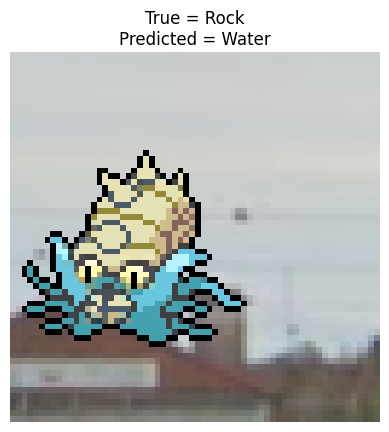

In [28]:
show_prediction(x_test, y_test, multi_label=False)

Model with an architecture that *overfits*

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=VAL_SPLIT, epochs=EPOCHS)

training_plot(history)

Convolutional Neural Network
==

Conv2d and MaxPooling layers

In [30]:
model = Sequential([
    layers.Conv2D(256, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal(), input_shape=INPUT_SHAPE),
    layers.Conv2D(256, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.Conv2D(128, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.MaxPooling2D((2, 2))
])

Classifier layers

In [31]:
classification_head = Sequential([
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])
model.add(classification_head)

In [ ]:
model.summary()

Hyperparameters

In [29]:
EPOCHS = 20
VAL_SPLIT = 0.125
LEARNING_RATE = 0.001

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_cnn = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=VAL_SPLIT)

Epoch 1/5


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


110/110 [==============================] - 22s 91ms/step - loss: 2.2775 - accuracy: 0.1500 - val_loss: 2.1614 - val_accuracy: 0.1860
Epoch 2/5
110/110 [==============================] - 7s 67ms/step - loss: 2.1529 - accuracy: 0.1749 - val_loss: 2.0816 - val_accuracy: 0.2100
Epoch 3/5
110/110 [==============================] - 7s 68ms/step - loss: 1.9706 - accuracy: 0.2689 - val_loss: 1.9314 - val_accuracy: 0.2920
Epoch 4/5
110/110 [==============================] - 8s 71ms/step - loss: 1.8001 - accuracy: 0.3543 - val_loss: 1.7664 - val_accuracy: 0.3480
Epoch 5/5
110/110 [==============================] - 8s 69ms/step - loss: 1.4842 - accuracy: 0.4583 - val_loss: 1.6857 - val_accuracy: 0.3980


In [ ]:
training_plot(history_cnn)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

7


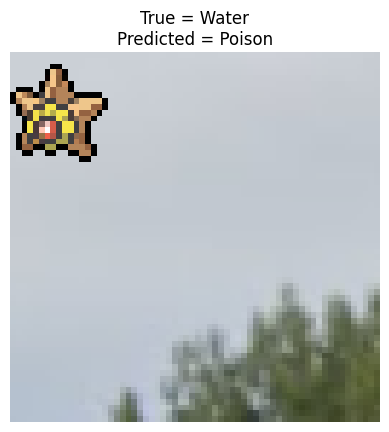

In [35]:
show_prediction(x_test, y_test, multi_label=False)

#Multi-label Classification

Feature extraction layers

In [36]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal(), input_shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(64, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.Conv2D(64, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(128, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.Conv2D(128, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
    layers.Conv2D(256, (3, 3), activation='relu',padding = "same",kernel_initializer=tf.keras.initializers.HeNormal()),
])

Classification head

In [37]:
classification_head = Sequential([
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='sigmoid'), 
])
model.add(classification_head)

In [39]:
EPOCHS = 20
VAL_SPLIT = 0.125
LEARNING_RATE = 1e-3

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_cnn_multi = model.fit(x_train, y_train_2types, epochs=EPOCHS, validation_split=VAL_SPLIT)

In [ ]:
training_plot(history_cnn_multi)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_2types, verbose=2)

In [ ]:
show_prediction(x_test, y_test_2types, multi_label=True)

# Pre-trained deep neural network models


## ConvNetXtXLarge

In [ ]:
feature_extractor = tf.keras.applications.ConvNeXtXLarge(input_shape=INPUT_SHAPE, include_top=False, include_preprocessing=False)
feature_extractor.trainable = False

In [ ]:
feature_extractor.summary()

Hyperparameters

In [ ]:
EPOCHS = 20
VAL_SPLIT = 0.125
LEARNING_RATE = 0.001

###Single-label classification

In [ ]:
tf.keras.backend.clear_session()
model = Sequential([
    feature_extractor,
     layers.GlobalAveragePooling2D(),
     layers.Dense(512, activation='relu'),
     layers.Dropout(0.3),
     layers.Dense(NUM_CLASSES, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=VAL_SPLIT)

In [ ]:
training_plot(history)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
show_prediction(x_test, y_test, multi_label=False)

###Multi-label Classification

In [ ]:
model = Sequential([
    feature_extractor,
     layers.GlobalAveragePooling2D(),
     layers.Dense(512, activation='relu'),
     layers.Dropout(0.3),
     layers.Dense(NUM_CLASSES, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_multi = model.fit(x_train, y_train_2types, epochs=EPOCHS, validation_split=VAL_SPLIT)

In [ ]:
training_plot(history_multi)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_2types, verbose=2)

In [ ]:
show_prediction(x_test, y_test_2types, multi_label=True)

##VGG16 


In [ ]:
feature_extractor = tf.keras.applications.VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')
feature_extractor.trainable = False

In [ ]:
feature_extractor.summary()

Hyperparameters

In [ ]:
EPOCHS = 20
VAL_SPLIT = 0.125
LEARNING_RATE = 0.001

###Single-label classification

In [ ]:
tf.keras.backend.clear_session()
model = Sequential([
    layers.Resizing(height=224, width=224),
    feature_extractor,
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=VAL_SPLIT)

In [ ]:
training_plot(history)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
show_prediction(x_test, y_test)

###Multi-label Classification

In [ ]:
tf.keras.backend.clear_session()
model = Sequential([
    layers.Resizing(height=224, width=224),
    feature_extractor,
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_multi = model.fit(x_train, y_train_2types, epochs=EPOCHS, validation_split=VAL_SPLIT)

In [ ]:
training_plot(history_multi)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_2types, verbose=2)

In [ ]:
show_prediction(x_test, y_test_2types, multi_label=True)